In [1405]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math


### Згенерувати вибірку заданого об’єму (не менше 50) з вказаного проміжку для дискретної статистичної змінної.


In [1406]:
def create_sample(size, start, end):
    import random
    return [random.randint(start, end) for _ in range(size)]

# sample = create_sample(20, 1, 10)
sample = [5,5,6,6,7,7,7,7,8,10,10,10,10,10,11,11,11,11,11,12,12,12,13,14,14,15,15,15,15,15,16,16,17,17,18,18,19,19,20,20,20,21,22,22,23,23,23,25,25,25]
sample

[5,
 5,
 6,
 6,
 7,
 7,
 7,
 7,
 8,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 13,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 17,
 17,
 18,
 18,
 19,
 19,
 20,
 20,
 20,
 21,
 22,
 22,
 23,
 23,
 23,
 25,
 25,
 25]

# Завдання 1 (Дискретний розподіл:)

## Побудувати варіаційний ряд


In [1407]:
def generate_variation_series(sample):
    return sorted(sample)

variation_series = generate_variation_series(sample)
variation_series

[5,
 5,
 6,
 6,
 7,
 7,
 7,
 7,
 8,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 13,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 17,
 17,
 18,
 18,
 19,
 19,
 20,
 20,
 20,
 21,
 22,
 22,
 23,
 23,
 23,
 25,
 25,
 25]

## Побудувати частотну таблицю пандасом


In [1408]:
def generate_frequency_table(variation_series):
    frequency_table = {}
    for i in variation_series:
        if i in frequency_table:
            frequency_table[i] += 1
        else:
            frequency_table[i] = 1
    return frequency_table

frequency_table = generate_frequency_table(variation_series)
frequency_table = pd.DataFrame(list(frequency_table.items()), columns=['x[i]', 'y[i]']).set_index('x[i]')
frequency_table








,y[i]
x[i],
5,2
6,2
7,4
8,1
10,5
11,5
12,3
13,1
14,2


## Представити графічно статистичний матеріал


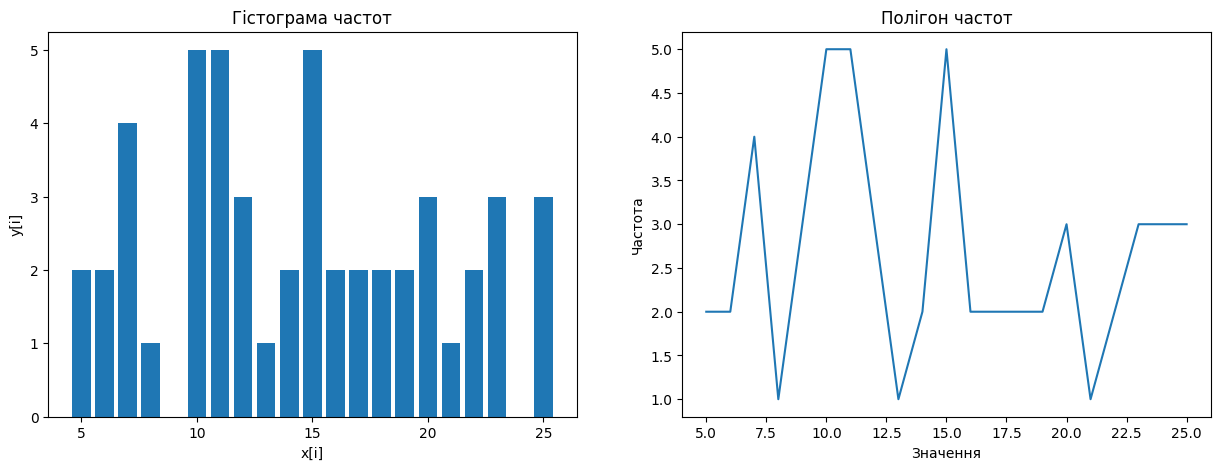

In [1409]:
def draw_statistical_material(frequency_table):
    _, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 5))
    ax1.bar(frequency_table.index, frequency_table['y[i]'])
    ax1.set_xlabel('x[i]')
    ax1.set_ylabel('y[i]')
    ax1.set_title('Гістограма частот')

    ax2.plot(frequency_table.index, frequency_table['y[i]'])
    ax2.set_xlabel('Значення')
    ax2.set_ylabel('Частота')
    ax2.set_title('Полігон частот')
    plt.show()

draw_statistical_material(frequency_table)



## побудувати графік емпіричної функції розподілу;


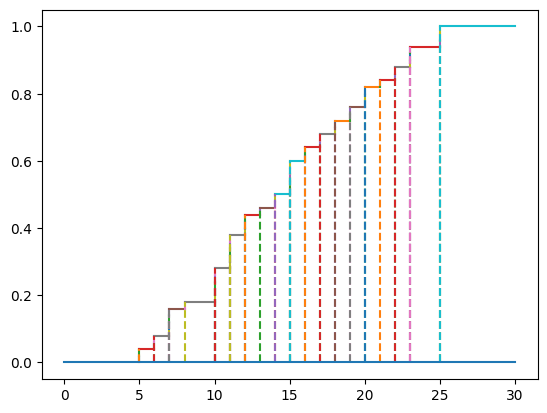

In [1410]:
cumulative_frequencies = [i/len(sample) for i in range(1, len(sample) + 1)]

def show_plot(values, cumulative_probs):
    # Побудова першої точки
    plt.plot([values[0]]*2, [0, cumulative_probs[0]])

    # Побудова горизонтальних сегментів для емпіричного розподілу
    for i in range(1, len(values)):
        plt.plot([values[i-1], values[i]], [cumulative_probs[i-1], cumulative_probs[i-1]])
        plt.plot([values[i], values[i]], [cumulative_probs[i-1], cumulative_probs[i]])

    # Продовження лінії вправо
    plt.plot([values[-1], values[-1]+5], [cumulative_probs[-1], cumulative_probs[-1]])

    # Побудова вертикальних штрихованих ліній на кожному значенні
    for i in range(len(values)):
        plt.plot([values[i]]*2, [0, cumulative_probs[i]], linestyle='dashed')

    # Побудова осі x
    plt.plot([0, values[-1]+5], [0, 0])

    plt.show()

show_plot(variation_series, cumulative_frequencies)


## обчислити числові характеристики дискретного розподілу.

In [1411]:
# 4. обчислити числові характеристики дискретного розподілу.
def find_median(a):
    a_len = len(a)
    return (a[a_len//2-1] + a[a_len//2]) / 2 if a_len % 2 == 0 else a[a_len//2]


def find_moda(counts, distinct_v):
    to_return = []
    for i in range(len(counts)):
        if counts[i] == np.max(counts):
            to_return.append(distinct_v[i])
    return to_return

def average_(distinct_values, counts):
    return np.average(distinct_values, weights=counts)

def scope(distinct_values):
    return np.ptp(distinct_values)

def deviation(distinct_v, counts):
    to_return = 0
    avg = average_(distinct_v, counts)
    for i in range(len(distinct_v)):
        to_return += (((distinct_v[i] - avg) ** 2) * counts[i])
    return to_return

def variance(distinct_v, counts):
    return deviation(distinct_v, counts)/(sum(counts)-1)

def standart(distinct_v, counts):
    return math.sqrt(variance(distinct_v, counts))

def variation(distinct_v, counts):
    return standart(distinct_v, counts) / average_(distinct_v, counts)

def selective_dispersion(distinct_v, counts):
    return deviation(distinct_v, counts)/sum(counts)

def selective_average_quadratic_deviation(distinct_v, counts):
    return math.sqrt(selective_dispersion(distinct_v, counts))

def m_k(k, distinct_v, counts):
    to_return = 0
    _avg = average_(distinct_v, counts)
    for i in range(len(distinct_v)):
        to_return += ((distinct_v[i] - _avg) ** k) * counts[i]
    return to_return/sum(counts)

def asymetry(distinct_v, counts):
    return m_k(3, distinct_v, counts) / (m_k(2, distinct_v, counts) ** (3/2))

def excess(distinct_v, counts):
    return m_k(4, distinct_v, counts) / (m_k(2, distinct_v, counts) ** (2)) - 3

def print_characteristics(distinct_values, counts):
    print("\nЧислові характеристики:")
    print("Медіана: " + str(find_median(distinct_values)))
    print("Мода: " + str(find_moda(counts, distinct_values)))
    print("Вибіркове середнє значення: " + str(average_(distinct_values, counts)))
    print("Розмах: " + str(scope(distinct_values)))
    print("Девіація: " + str(deviation(distinct_values, counts)))
    print("Варіанса: " + str(variance(distinct_values, counts)))
    print("Стандарт: " + str(standart(distinct_values, counts)))
    print("Варіація: " + str(variation(distinct_values, counts)))
    print("Вибіркова дисперсія: " + str(selective_dispersion(distinct_values, counts)))
    print("Вибіркове середнє квадратичне відхилення: " + str(selective_average_quadratic_deviation(distinct_values, counts)))
    print("Центральний момент другого порядку: " + str(m_k(2, distinct_values, counts)))
    print("Центральний момент третього порядку: " + str(m_k(3, distinct_values, counts)))
    print("Центральний момент четвертого порядку: " + str(m_k(4, distinct_values, counts)))
    print("Асиметрія: " + str(asymetry(distinct_values, counts)))
    print("Ексцес: " + str(excess(distinct_values, counts)))

print_characteristics(np.array(list(frequency_table.index)), np.array(list(frequency_table['y[i]'])))





Числові характеристики:
Медіана: 15
Мода: [10, 11, 15]
Вибіркове середнє значення: 14.48
Розмах: 20
Девіація: 1652.4799999999998
Варіанса: 33.72408163265305
Стандарт: 5.807243892988571
Варіація: 0.40105275504064714
Вибіркова дисперсія: 33.0496
Вибіркове середнє квадратичне відхилення: 5.7488781514309375
Центральний момент другого порядку: 33.0496
Центральний момент третього порядку: 34.25798399999997
Центральний момент четвертого порядку: 2168.4038195199996
Асиметрія: 0.1803069598548387
Ексцес: -1.0147840837943793


## Квантилі

In [1412]:
def calculate_deciles(a):
    if len(a) % 10 == 0:
        return [a[int(len(a) / 10 * (i + 1))] for i in range(9)]
    else:
        return []

def get_deciles(a):
    deciles = calculate_deciles(a)
    if deciles:
        print(f"Децилі: {deciles}")
        print(f"Інтердецильна широта: {deciles[-1] - deciles[0]}\n")
    
get_deciles(variation_series)


Децилі: [7, 10, 11, 12, 15, 16, 18, 20, 23]
Інтердецильна широта: 16



# Завдання 2 (Неперервний розподіл)

In [1413]:
# Згенерувати вибірку заданого обʼєму (не менше 50) з вказаного проміжку для неперервної статистичної змінної. На підставі отриманих вибіркових даних:
# 1.утворити інтервальний статистичний розподіл
# 2.побудувати гістограму та графік емпіричної функції розподілу
# 3. обчислити числові характеристики.

## Утворити інтервальний статистичний розподіл

In [1414]:
# 1. утворити інтервальний статистичний розподіл  variation_series
def create_interval_statistical_distribution(variation_series, k):
    a = min(variation_series)
    b = max(variation_series)
    h = (b - a) / k
    intervals = [a + i * h for i in range(k + 1)]
    frequency_table = {}
    for i in range(k):
        frequency_table[(intervals[i], intervals[i+1])] = len([x for x in variation_series if intervals[i] <= x < intervals[i+1]])
    return frequency_table

k = 6
interval_statistical_distribution = create_interval_statistical_distribution(variation_series, k)
interval_statistical_distribution = pd.DataFrame(list(interval_statistical_distribution.items()), columns=['Інтервал', 'Частота']).set_index('Інтервал')
interval_statistical_distribution



,Частота
Інтервал,
"(5.0, 8.333333333333334)",9
"(8.333333333333334, 11.666666666666668)",10
"(11.666666666666668, 15.0)",6
"(15.0, 18.333333333333336)",11
"(18.333333333333336, 21.666666666666668)",6
"(21.666666666666668, 25.0)",5
